# **Final project** 

### **Dataset description**

* `Host related columns`:

host_id,
host_name,
host_since,
host_location,
host_about,
host_response_time,
host_response_rate,
host_acceptance_rate,
host_is_superhost,
host_thumbnail_url,
host_picture_url,
host_neighbourhood,
host_listings_count,
host_total_listings_count,
host_verifications,
host_has_profile_pic,
host_identity_verified,
host_url.

* `Property and room features`:
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities

* `Location based columns`:
latitude
longitude
zipcode
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
country
country_code
market
smart_location

* `Price and cost fields`:

price
weekly_price
monthly_price
security_deposit
cleaning_fee
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped

* `Review metrics`:

number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
reviews_per_month

* `Metadata and URLs`:
id
name
listing_url
description
summary
space
neighborhood_overview
picture_url
calendar_updated
scrape_id
last_scraped
source
license

* `Experience and Misc`:
experiences_offered
is_location_exact
requires_license
instant_bookable
is_business_travel_ready




### **Goals of the analysis**

* Price determinants: Which factors (location, room type, number of reviews, amenities) most strongly relate to  nightly price?
* Demand seasonality: Is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?
* Review impact: How do review metrics (number_of_reviews, reviews_per_month, review_scores_rating) correlate with price and occupancy?
* Listing characteristics: Are certain property types (e.g. entire home vs private room) more common in specific neighborhoods or price tiers?

* `PCA and Geographical clustering`

### **Importing main libraries**

In [105]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 


### **Data inspection**

In [106]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36121,https://www.airbnb.com/rooms/36121,20250301213336,2025-03-03,city scrape,Lg Rm in Historic Prospect Heights,Cozy space share in the heart of a great neigh...,Full of tree-lined streets and beautiful brown...,https://a0.muscache.com/pictures/8776354/35b32...,62165,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.05
1,36647,https://www.airbnb.com/rooms/36647,20250301213336,2025-03-03,city scrape,"1 Bedroom & your own Bathroom, Elevator Apartment",Private bedroom with your own bathroom in a 2 ...,"Manhattan, SE corner of 2nd Ave/ E. 110th street",https://a0.muscache.com/pictures/miso/Hosting-...,157798,...,4.90,4.38,4.71,NaN,f,1,0,1,0,0.58
2,38663,https://www.airbnb.com/rooms/38663,20250301213336,2025-03-02,city scrape,Luxury Brownstone in Boerum Hill,"Beautiful, large home in great hipster neighbo...","diverse, lively, hip, cool: loaded with restau...",https://a0.muscache.com/pictures/miso/Hosting-...,165789,...,4.88,4.86,4.62,OSE-STRREG-0001784,f,1,0,1,0,0.28
3,38833,https://www.airbnb.com/rooms/38833,20250301213336,2025-03-03,city scrape,Spectacular West Harlem Garden Apt,This is a very large and unique space. An inc...,West Harlem is now packed with great restauran...,https://a0.muscache.com/pictures/7554f9e5-4ab0...,166532,...,4.96,4.79,4.82,OSE-STRREG-0000476,f,1,1,0,0,1.36
4,39282,https://www.airbnb.com/rooms/39282,20250301213336,2025-03-02,city scrape,“Work-from-home” from OUR home.,*Monthly Discount will automatically apply <br...,THE NEIGHBORHOOD:<br />Our apartment is locate...,https://a0.muscache.com/pictures/ef8f43ad-d967...,168525,...,4.88,4.85,4.78,OSE-STRREG-0001150,f,2,0,2,0,1.54


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37434 entries, 0 to 37433
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37434 non-null  int64  
 1   listing_url                                   37434 non-null  object 
 2   scrape_id                                     37434 non-null  int64  
 3   last_scraped                                  37434 non-null  object 
 4   source                                        37434 non-null  object 
 5   name                                          37432 non-null  object 
 6   description                                   36441 non-null  object 
 7   neighborhood_overview                         20224 non-null  object 
 8   picture_url                                   37433 non-null  object 
 9   host_id                                       37434 non-null 

In [108]:
# listing all columns
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

* `amenities`: needs cleaning

In [109]:
df['amenities'].unique()

array(['["Refrigerator", "Dishes and silverware", "Wifi", "Kitchen", "Elevator", "City skyline view", "Heating"]',
       '["Oven", "Blender", "Luggage dropoff allowed", "Dedicated workspace", "Dining table", "Microwave", "Hair dryer", "Host greets you", "Essentials", "Long term stays allowed", "Iron", "Bed linens", "Elevator", "Bathtub", "Heating", "Free street parking", "Paid washer \\u2013 In building", "Air conditioning", "Toaster", "Cleaning products", "Clothing storage", "Dishes and silverware", "Hot water", "Wifi", "Kitchen", "Coffee maker", "Refrigerator", "Dryer \\u2013 In building", "Hangers", "Shampoo", "Freezer", "Room-darkening shades"]',
       '["Portable fans", "Oven", "Baking sheet", "Fire extinguisher", "First aid kit", "Free washer \\u2013 In unit", "Blender", "Luggage dropoff allowed", "Dedicated workspace", "Extra pillows and blankets", "Bose sound system with Bluetooth and aux", "Cooking basics", "Dining table", "Coffee", "Microwave", "Hair dryer", "Window AC unit

* The `license` column will be preprocessed to a has_licence column (nans become 0s and the rest of them become 1s), assuming that the nans in this column mean that the property has no licence. 
In some cities Airbnb hosts are required by law to register and obtain a licence before they can legally rent their property. The licence field is optional in many regions, so for many listings it's simply NaN. This means that:
    - license depends on the location
    - engineering the has_licence feature would extract the meaningful structure of it in a way that supports our analysis

In [110]:
# chacking unique values for license
df['license'].unique()

array([nan, 'OSE-STRREG-0001784', 'OSE-STRREG-0000476', ...,
       'OSE-STRREG-0002922', 'OSE-STRREG-0002813', 'OSE-STRREG-0002894'],
      dtype=object)

* `reviews_per_month`: to be preprocessed

In [111]:
# checking unique values for reviews_per_month
df['reviews_per_month'].unique()

array([5.0000e-02, 5.8000e-01, 2.8000e-01, 1.3600e+00, 1.5400e+00,
       2.5000e-01, 2.6000e-01, 1.0100e+00, 3.0000e-02, 1.3400e+00,
       7.0000e-02, 2.1600e+00, 2.0000e-01, 1.0300e+00, 9.5000e-01,
       1.1000e-01, 8.9000e-01, 7.4000e-01, 2.3000e-01, 2.1000e-01,
       1.9100e+00, 3.9000e-01, 1.2500e+00, 4.0000e-02, 1.3200e+00,
       7.1000e-01, 3.1000e-01, 4.5000e-01,        nan, 1.7000e+00,
       4.3000e-01, 9.7000e-01, 2.9000e-01, 3.3000e-01, 4.4200e+00,
       8.0000e-02, 7.8000e-01, 1.6900e+00, 1.0000e-01, 2.8100e+00,
       2.1100e+00, 1.0000e-02, 1.0700e+00, 1.6500e+00, 4.2000e-01,
       1.7000e-01, 1.6000e+00, 1.5800e+00, 3.0000e-01, 9.0000e-01,
       1.4700e+00, 3.8000e-01, 9.0000e-02, 3.2000e-01, 6.1000e-01,
       1.9000e-01, 1.1000e+00, 6.8000e-01, 8.3000e-01, 5.2000e-01,
       1.1200e+00, 3.5000e-01, 1.7400e+00, 9.4000e-01, 1.7700e+00,
       1.1800e+00, 2.6700e+00, 1.4000e-01, 2.4000e-01, 1.5700e+00,
       1.1700e+00, 2.7000e-01, 1.3000e-01, 1.8000e-01, 7.5000e

* `instant_bookable`: to be preprocessed (assuming that f means false and t means true, it will be converted into a binary column)

In [112]:
# checking the unique values for instant_bookable
df['instant_bookable'].unique()

array(['f', 't'], dtype=object)

* `price`: to be preprocessed (already did -- to get from project 3)

In [113]:
# checking unique values for price
df['price'].unique()

array(['$200.00', '$82.00', '$765.00', ..., '$872.00', '$16.00', '$14.00'],
      dtype=object)

* `room_type` and `property_type`

In [114]:
# get unique values for room_type
print(df['room_type'].unique())

['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [115]:
# get unique values for property_type
print(df['property_type'].unique())

['Private room in rental unit' 'Private room in condo'
 'Private room in home' 'Entire home' 'Entire rental unit'
 'Private room in loft' 'Private room in guest suite' 'Entire place'
 'Entire loft' 'Entire condo' 'Entire townhouse'
 'Private room in townhouse' 'Private room in bed and breakfast'
 'Room in boutique hotel' 'Entire serviced apartment' 'Entire guesthouse'
 'Entire guest suite' 'Private room in houseboat' 'Private room'
 'Shared room in rental unit' 'Private room in guesthouse' 'Boat'
 'Room in serviced apartment' 'Private room in villa'
 'Private room in religious building' 'Casa particular'
 'Private room in serviced apartment' 'Shared room in home' 'Cave'
 'Shared room in townhouse' 'Private room in tiny home' 'Entire bungalow'
 'Floor' 'Room in hotel' 'Houseboat' 'Private room in bungalow'
 'Shared room in condo' 'Private room in floor' 'Room in aparthotel'
 'Entire bed and breakfast' 'Private room in resort' 'Entire cottage'
 'Shared room in loft' 'Private room in host

In [116]:
# check for each values in the room_type column, the coresponding values in the property_type column
for room_type in df['room_type'].unique():
    print(f"Room Type: {room_type}")
    print(df[df['room_type'] == room_type]['property_type'].unique())
    print()

Room Type: Private room
['Private room in rental unit' 'Private room in condo'
 'Private room in home' 'Private room in loft'
 'Private room in guest suite' 'Private room in townhouse'
 'Private room in bed and breakfast' 'Room in boutique hotel'
 'Private room in houseboat' 'Private room' 'Private room in guesthouse'
 'Private room in villa' 'Private room in religious building'
 'Private room in serviced apartment' 'Private room in tiny home'
 'Room in hotel' 'Private room in bungalow' 'Private room in floor'
 'Private room in resort' 'Private room in hostel' 'Private room in tent'
 'Private room in in-law' 'Room in aparthotel' 'Private room in farm stay'
 'Private room in casa particular' 'Private room in cottage'
 'Private room in vacation home' 'Private room in earthen home'
 'Private room in barn' 'Private room in train'
 'Private room in lighthouse' 'Private room in camper/rv'
 'Private room in kezhan' 'Private room in ranch' 'Private room in castle'
 'Private room in tower' 'Pri

In [117]:
# For columns that have the property_type value as 'Room in hotel' or 'Room in aparthotel', change the room_type value to 'Hotel room'
df.loc[df['property_type'].isin(['Room in hotel', 'Room in aparthotel']), 'room_type'] = 'Hotel room'

In [118]:
for room_type in df['room_type'].unique():
    print(f"Room Type: {room_type}")
    print(df[df['room_type'] == room_type]['property_type'].unique())
    print()

Room Type: Private room
['Private room in rental unit' 'Private room in condo'
 'Private room in home' 'Private room in loft'
 'Private room in guest suite' 'Private room in townhouse'
 'Private room in bed and breakfast' 'Room in boutique hotel'
 'Private room in houseboat' 'Private room' 'Private room in guesthouse'
 'Private room in villa' 'Private room in religious building'
 'Private room in serviced apartment' 'Private room in tiny home'
 'Private room in bungalow' 'Private room in floor'
 'Private room in resort' 'Private room in hostel' 'Private room in tent'
 'Private room in in-law' 'Private room in farm stay'
 'Private room in casa particular' 'Private room in cottage'
 'Private room in vacation home' 'Private room in earthen home'
 'Private room in barn' 'Private room in train'
 'Private room in lighthouse' 'Private room in camper/rv'
 'Private room in kezhan' 'Private room in ranch' 'Private room in castle'
 'Private room in tower' 'Private room in dome']

Room Type: Entir

In [119]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [122]:
# list of columns to drop
# These columns are not useful for our analysis and will be dropped
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'host_neighbourhood', 'picture_url', 'host_id', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic', 'host_neighbourhood', 'host_url', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'bathrooms_text', 'neighbourhood', 'calendar_updated', 'calendar_last_scraped', 'estimated_occupancy_l365d', 'host_listings_count', 'host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_eoy', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly', 'estimated_occupancy_l365d','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'neighbourhood_group_cleansed', 'has_availability', 'availability_60', 'availability_90', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms' 'neighborhood_overview', 'property_type']

In [123]:
df.drop(columns=columns_to_drop, inplace=True)
# checking the columns after dropping
df.columns

KeyError: "['calculated_host_listings_count_shared_roomsneighborhood_overview'] not found in axis"

**Cleaned:** room_type, license, 

### **Dealing with missing values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37434 entries, 0 to 37433
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     37432 non-null  object 
 1   description              36441 non-null  object 
 2   host_since               37396 non-null  object 
 3   host_is_superhost        36994 non-null  object 
 4   host_verifications       37396 non-null  object 
 5   host_identity_verified   37396 non-null  object 
 6   neighbourhood_cleansed   37434 non-null  object 
 7   latitude                 37434 non-null  float64
 8   longitude                37434 non-null  float64
 9   room_type                37434 non-null  object 
 10  accommodates             37434 non-null  int64  
 11  bathrooms                22503 non-null  float64
 12  bedrooms                 31523 non-null  float64
 13  beds                     22352 non-null  float64
 14  amenities             

In [ ]:
# printing the columns that have more than 0 missing values
missing_columns = df.columns[df.isna().any()].tolist()
print("Columns with missing values:", missing_columns)

# printing missing values in order of the number of missing values
missing_values = df[missing_columns].isna().sum().sort_values(ascending=False)
print("Missing values in each column:\n", missing_values)

Columns with missing values: ['name', 'description', 'host_since', 'host_is_superhost', 'host_verifications', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'price', 'estimated_revenue_l365d', 'first_review', 'last_review', 'review_scores_value', 'license']
Missing values in each column:
 license                    32065
price                      15126
estimated_revenue_l365d    15126
beds                       15082
bathrooms                  14931
review_scores_value        11804
first_review               11787
last_review                11787
bedrooms                    5911
description                  993
host_is_superhost            440
host_since                    38
host_verifications            38
host_identity_verified        38
name                           2
dtype: int64


* The `license` column will be preprocessed into a binary column ...

In [ ]:
# creating binary column: 1 id the license is not NaN, 0 if it is NaN
df['has_license'] = df['license'].apply(lambda x: 1 if pd.notna(x) else 0)

# print the first 5 rows of the new column
print(df['has_license'].head())

# checking the unique values for the new column
print(df['has_license'].unique())

# getting the index of license column
license_index = df.columns.get_loc('license')

# moving the has_license column after the license column
df.insert(license_index + 1, 'has_license', df.pop('has_license'))

# dropping the license column
df.drop(columns=['license'], inplace=True)

0    0
1    0
2    1
3    1
4    1
Name: has_license, dtype: int64
[0 1]


In [ ]:
!pip install missingno
import missingno as msno

<Axes: >

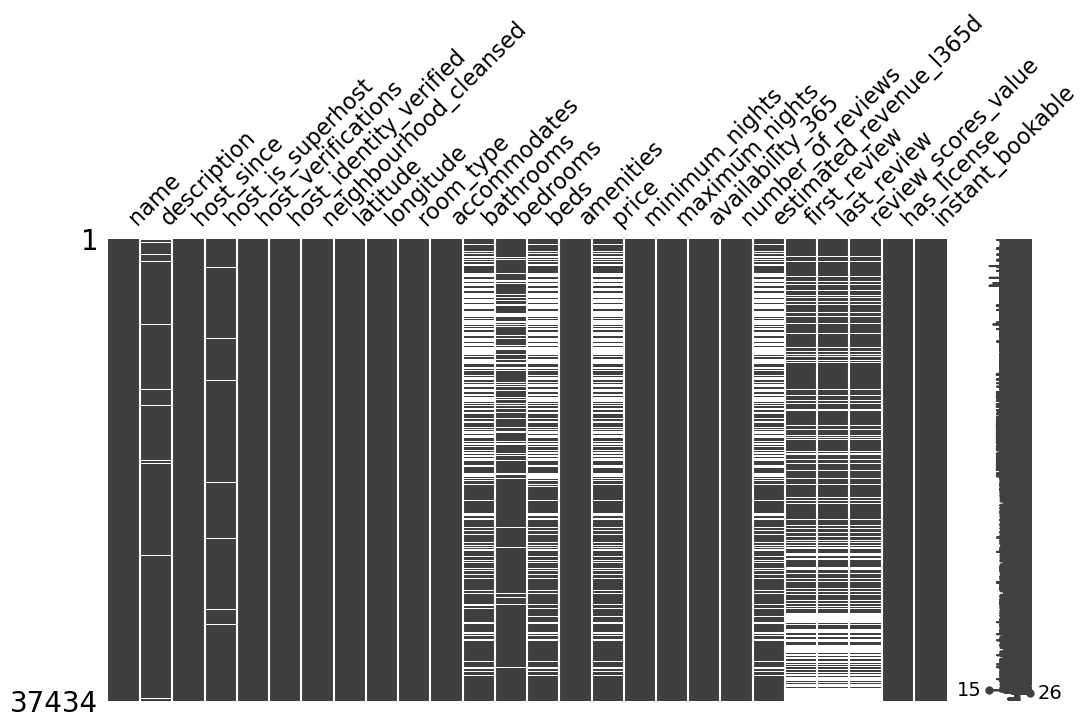

In [ ]:
# visualising the missing values in dataframe
msno.matrix(df, figsize=(12, 6))

<Axes: >

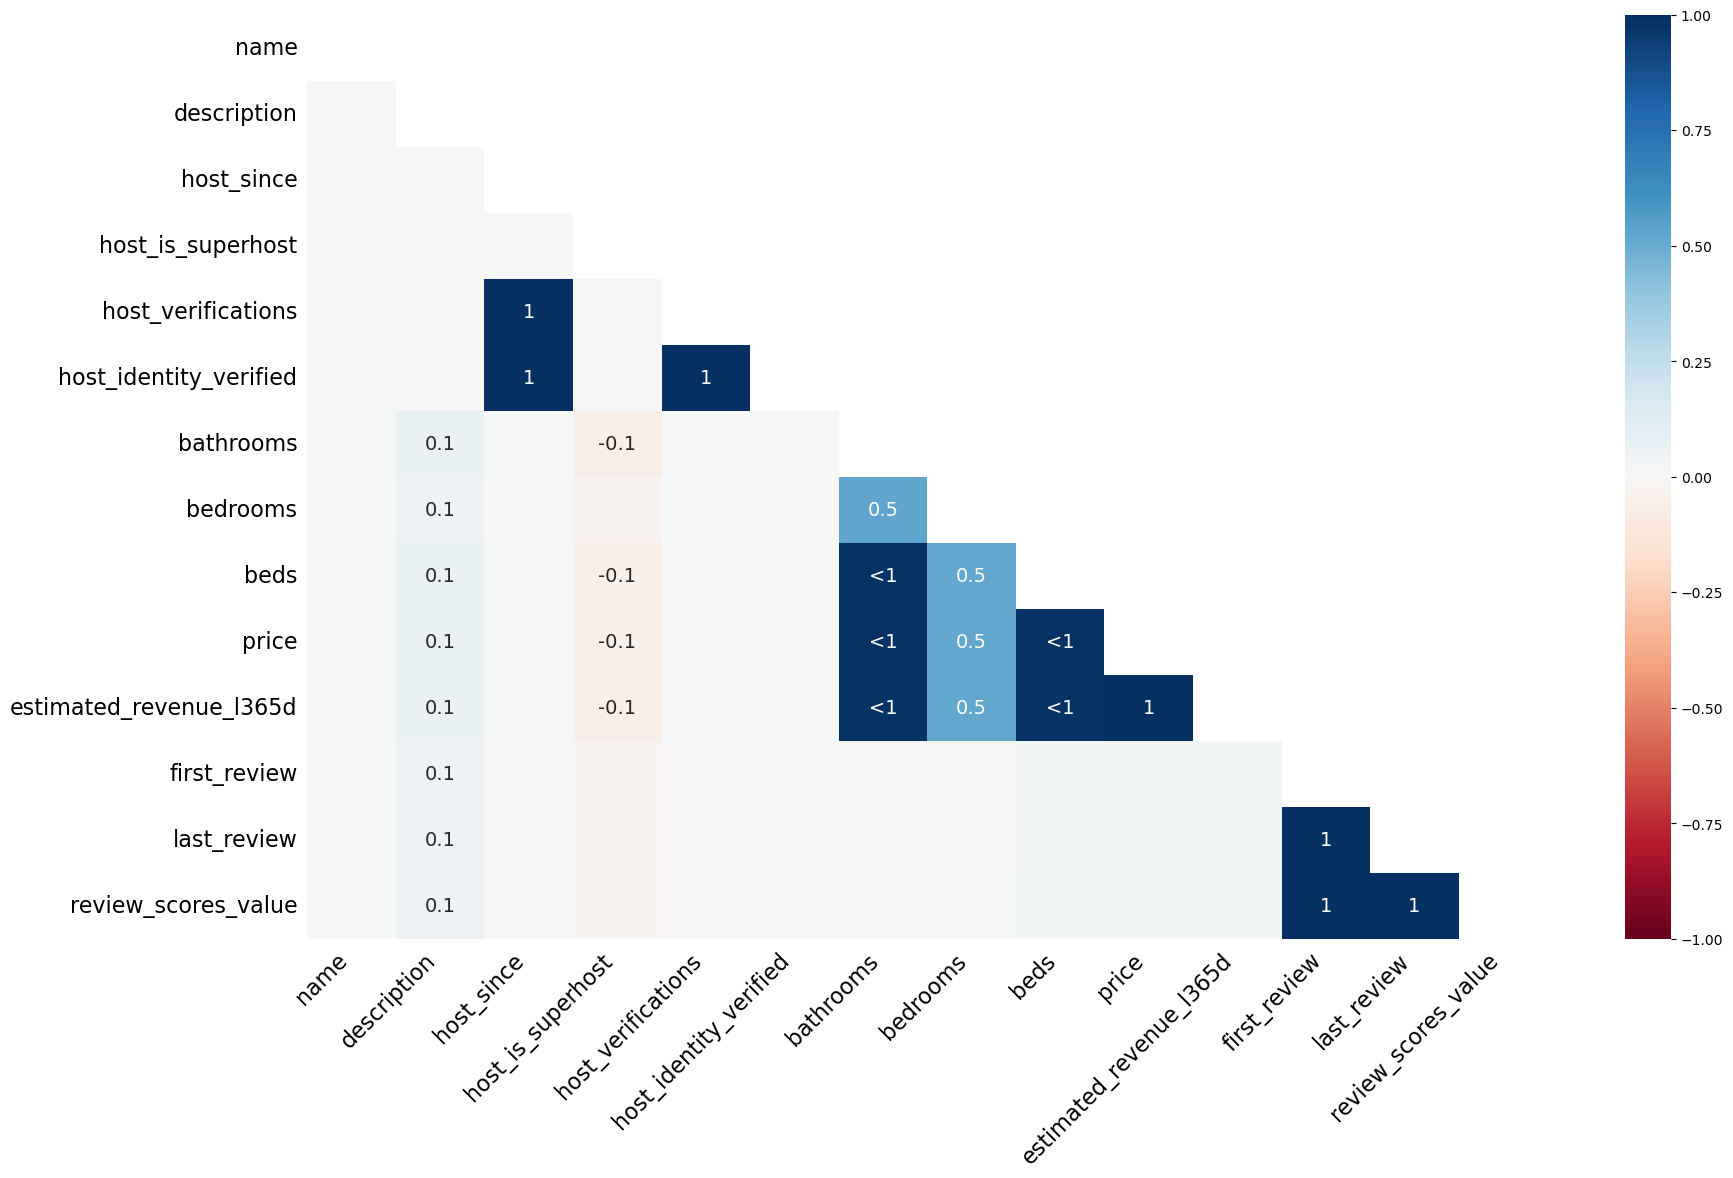

In [ ]:
# heatmap
msno.heatmap(df)

<Axes: >

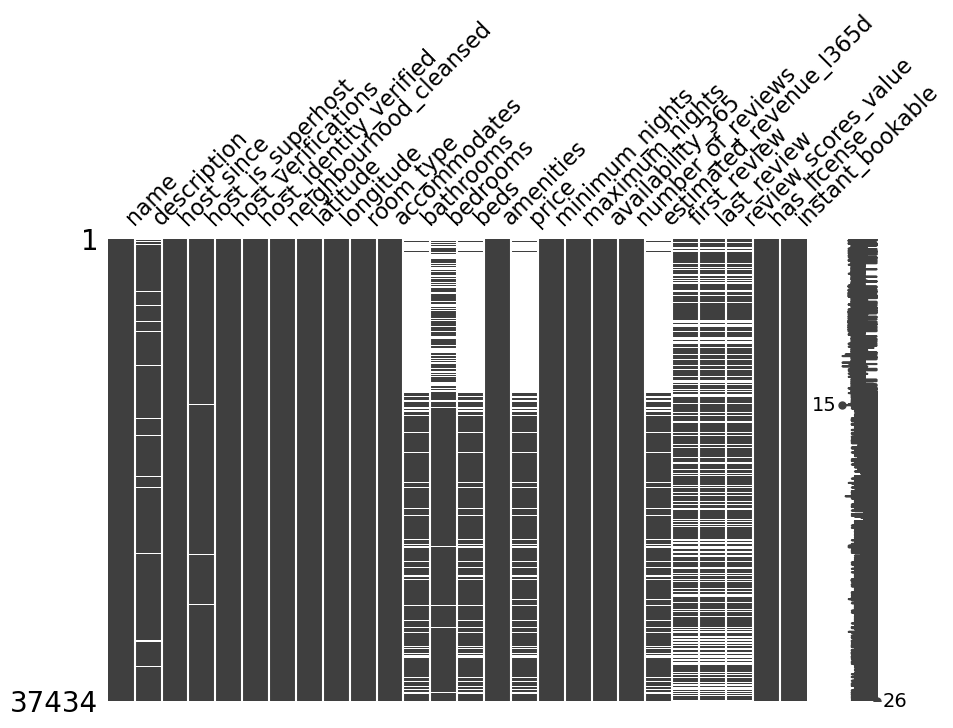

In [ ]:
# sorted by availability_365
sorted_availability = df.sort_values('availability_365', ascending=True)
msno.matrix(sorted_availability, figsize=(10, 6))

In [ ]:
# visualising the first 10 rows of the dataset, first 20 columns of the dataset
sorted_availability.iloc[:10, :20].head(10)

,name,description,host_since,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews
15929,Pent House Nest Filled with Natural Light,Beautiful pent house with 1 bedroom apartment ...,2013-10-04,f,"['email', 'phone']",f,Bushwick,40.699960,-73.933230,Private room,2,NaN,NaN,NaN,"[""Kitchen"", ""Fire extinguisher"", ""First aid ki...",NaN,30,1125,0,1
11177,"Prospect Park, Bk Museum, Botanic Gardens and You","Right smack in the center of Brooklyn, one blo...",2012-06-19,f,"['email', 'phone']",t,Prospect Heights,40.673160,-73.965000,Entire home/apt,3,NaN,1.0,NaN,"[""Fire extinguisher"", ""Dedicated workspace"", ""...",NaN,30,31,0,4
11178,River front Brand New upper East side apt,A beautiful brand new Upper east side apartmen...,2017-01-16,f,"['email', 'phone']",t,Upper East Side,40.768990,-73.948680,Entire home/apt,2,NaN,1.0,NaN,"[""Oven"", ""First aid kit"", ""Extra pillows and b...",NaN,30,1125,0,14
11179,"ONE Room →→→20mins to TimesSQ ☆彡 COZY, COZY, ...",This cozy bedroom is a great place to relax af...,2014-08-01,f,"['email', 'phone']",t,Woodside,40.742560,-73.902770,Private room,2,NaN,NaN,NaN,"[""Hangers"", ""Wifi"", ""Kitchen"", ""Private living...",NaN,30,1125,0,7
11180,Cozy Room in Woodside Queens!,"The apartment is located in Woodside, Queens.<...",2018-07-05,f,"['email', 'phone']",t,Woodside,40.742490,-73.893170,Private room,2,NaN,NaN,NaN,"[""Air conditioning"", ""Hangers"", ""Carbon monoxi...",NaN,30,1125,0,6
27779,Private BathRoom @Grand Ave,"This apartment is located 3min from subway ""Gr...",2018-07-24,f,"['email', 'phone']",t,Elmhurst,40.736320,-73.878840,Private room,2,NaN,NaN,NaN,"[""Dedicated workspace"", ""Hangers"", ""Carbon mon...",NaN,30,1125,0,0
11184,PRIVATE APARTMENT IN DOORMAN BUILDING,Fully furnished alcove studio with a walk-in c...,2016-09-12,f,"['email', 'phone']",t,Financial District,40.704080,-74.006870,Entire home/apt,2,NaN,NaN,NaN,"[""Gym"", ""Hair dryer"", ""Self check-in"", ""Essent...",NaN,30,1125,0,1
11186,Soho neighborhood apartment,NaN,2017-12-20,f,"['email', 'phone']",f,SoHo,40.725320,-74.000370,Private room,1,NaN,1.0,NaN,"[""Bed linens"", ""Fire extinguisher"", ""First aid...",NaN,30,1125,0,14
11188,NYC 3 Story townhouse near subway & Yankee Sta...,Welcome to a huge historic 3 story townhouse. ...,2015-03-17,f,"['email', 'phone', 'work_email']",t,Longwood,40.824950,-73.903090,Private room,4,NaN,5.0,NaN,"[""Outdoor furniture"", ""Kitchen"", ""Children\u20...",NaN,30,30,0,2
27777,Private BathRoom 10min from Roosevelt 74st sta...,"This apartment is located 3min from subway ""Gr...",2014-08-01,f,"['email', 'phone']",t,Elmhurst,40.737976,-73.880777,Private room,2,NaN,NaN,NaN,"[""Dedicated workspace"", ""Hangers"", ""Carbon mon...",NaN,30,1125,0,0


**Observation**: so it seems that the columns with lowest availability are more likely to have missing values in the bathrooms, beds, price and estimated_revenue_l365d columns.

<Axes: >

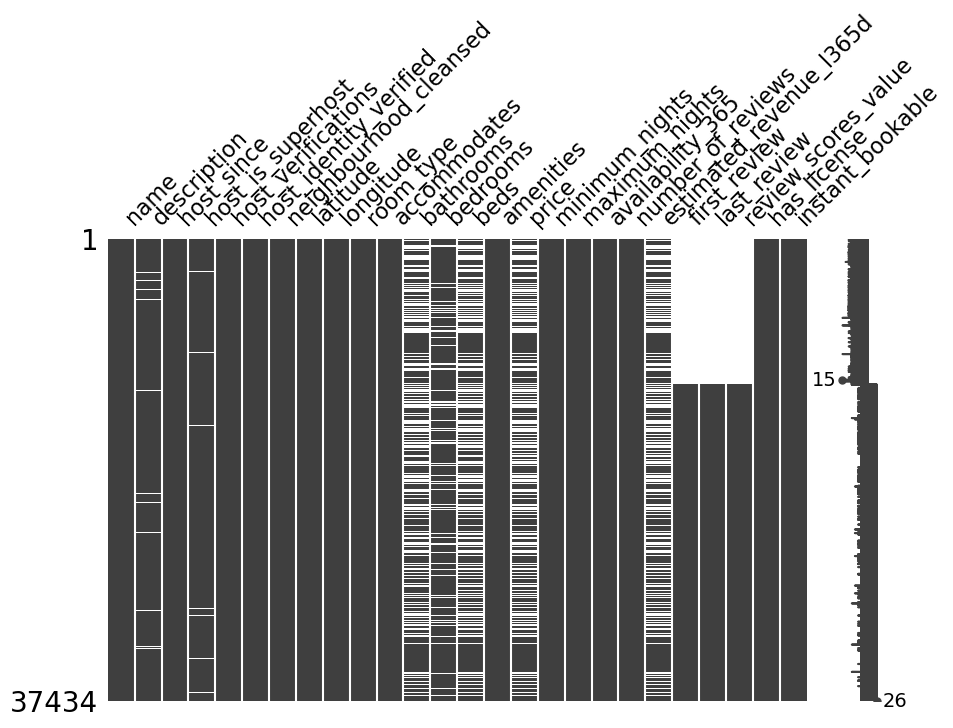

In [ ]:
# sorted by number_of_reviews
sorted_reviews = df.sort_values('number_of_reviews', ascending=True)
msno.matrix(sorted_reviews, figsize=(10, 6))

In [ ]:
# getting all unique values of number_of_reviews in the dataframe
print(df['review_scores_value'].unique())

[5.   4.71 4.62 4.82 4.78 4.86 4.4  4.58 4.83 4.89 4.76 4.93 4.69 4.73
 4.65 4.72 4.64 4.67  nan 4.53 4.41 4.79 4.8  4.7  4.55 4.63 4.57 4.85
 4.84 4.68 4.3  4.77 4.56 4.47 4.94 4.91 4.35 4.59 4.74 4.27 4.25 4.44
 4.45 4.81 4.16 4.33 4.22 4.48 4.5  4.6  4.88 4.54 4.92 4.9  4.75 4.96
 4.61 4.52 4.95 4.51 4.42 4.66 4.87 4.   3.93 4.2  4.46 4.29 4.43 3.
 3.25 4.17 4.06 4.14 4.26 4.97 4.37 4.1  4.28 3.98 4.38 4.08 4.13 4.39
 4.34 4.24 4.49 4.11 3.67 2.   4.21 3.9  4.15 4.32 4.36 4.31 3.89 4.98
 3.83 3.6  4.18 4.19 4.05 1.   3.5  3.8  4.23 0.   3.81 3.57 3.86 2.5
 3.91 4.09 4.99 3.33 3.75 3.55 3.82 3.71 4.07 3.85 3.88 4.12 3.92 3.97
 4.04 3.36 3.42 3.64 1.33 3.13 3.78 2.33 3.29 2.67 3.2  1.67 3.63 3.96
 1.5  3.7  3.73 3.17 2.89 3.61 3.4  4.01 3.94 3.95 3.79 4.03 4.02 3.37
 3.41 3.72 3.68 3.65 2.6  3.99 3.45 3.14 3.28 3.53 3.43 3.58 3.22 3.76
 3.69 3.11 3.77]


In [ ]:
# creating a dataset that contains only the rows that have null values in first_review, last_review, and review_scores_value
subset_nulls = df[df[['first_review', 'last_review', 'review_scores_value']].isnull().any(axis=1)]

# getting all unique values for the number_of_reviews in the subset_nulls dataset
print(subset_nulls['number_of_reviews'].unique())

[0 1]


**Observation:** So it seems that first_review, last_review and review_scores_value only has missing values in the rows that have values 0 or one for the number_of_reviews.

In [ ]:
# printing all rows of the dataset that have 1 as value of number_of_reviews column
print(df[df['number_of_reviews'] == 1])

                                                    name  \
8      Uptown Sanctuary w/ Private Bath (Month to Month)   
49                     Cozy Private Room in West Harlem!   
61                        Cozy Studio in Great Location!   
140                   New Clean Spacious Bed & Breakfast   
187           Room in Chic Modern High Line Luxury- New!   
...                                                  ...   
36520           Lux Crown Heights Townhouse Second Floor   
36531   Cozy 2 beds near SoHo/Perfect for Shares or Solo   
36542                   Hidden Gem Studio in Bed-Stuy BK   
36653                     Cozy Private room in Manhattan   
36657                              Apartment in Brooklyn   

                                             description  host_since  \
8      This charming distancing-friendly month-to-mon...  2009-05-07   
49     Located in the heart of West Harlem, 7-10 min ...  2011-05-10   
61     This is a great fully furnished studio, lots o...  2010-

# Preprocessing

## Identify the variable 

## 1) categorical -> nominal, ordinal. does it need encoding and what type of encoding is needed.

## 2) identify the numerical values (continous, discrete), importance of them in predictions, identify missing values in numerical values, think of ways to fill them. write the missing value implacements with reasoning and identofy dependencies between them.

## 3) Check out the unique values in each column, maybe there are some other types of variables or numpy nans. 

## 4) Figure out the relationships between variables, what is depended on what and think of Techniques for rempalcement or feature engineering.

## 5) Modify column names because they are too long, assign reasonable names.

## 6) Dive into the features themselves, for example: is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?

# Preprocessing

### Since there are 37K rows and 79 columns, Let's drop the rows of those features that hava the missing count of 15K. It would have been better to check if the data is MAR or MCAR but in this case the number of missing rows is the thing i took into account and decided to drop them, becasue this is AirBnb real world data and simply predictiong the missing values or imputing them in any way would be unreasonable.
### Also the type of rows taht are missing are from the most importnant features in the dataset like: price, bathrooms, beds, estimated revenue, neighbourhood.Dropping the rows from this features will not have that much of an importance to the other attributes since they are the important ones.

## Strip the categorical columns that contain description or large texts so that cleaning process won't begin to have issues.

In [ ]:
# Strip whitespace and convert prices
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

In [ ]:
for col in ['price', 'cleaning_fee', 'extra_people']:
    if col in df.columns:
        df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_19090/741970556.py:3: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


## Convert host_since, first_review, last_review columns into pandas Datetime and normalize

## Add one more feature that is active days for simplicity

In [ ]:
# Convert to datetime and normalize (remove time for calculations)
for col in ['host_since', 'first_review', 'last_review']:
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.normalize()

# Optional: Create formatted string columns for display or export
df['host_since_str'] = df['host_since'].dt.strftime('%Y-%m-%d')
df['first_review_str'] = df['first_review'].dt.strftime('%Y-%m-%d')
df['last_review_str'] = df['last_review'].dt.strftime('%Y-%m-%d')


In [ ]:
df['host_duration_days'] = (pd.Timestamp.today() - df['host_since']).dt.days
df['active_days'] = (df['last_review'] - df['first_review']).dt.days


## Map the {True False} values to 0 and 1 for simplicity

In [ ]:
df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

0        0
1        0
2        0
3        1
4        1
        ..
37429    0
37430    1
37431    0
37432    0
37433    1
Name: host_is_superhost, Length: 37434, dtype: int64

## add one more column that describes the popularity by review count

In [ ]:
df['is_popular'] = (df['number_of_reviews'] > 100).astype(int)

## Clean Description column from html formats 

In [ ]:
df['description'] = df['description'].replace('<br />', '').replace('<br/>', '').replace('<br>', '')

In [ ]:
df['description'] = df['description'].fillna('')

## Replaced numpy nan's and None's with pandas NaN, please dont critisize it is easier to see pandas NaN's

In [ ]:
# Replace string 'NaN', 'nan', 'None' with actual np.nan
df.replace(['NaN', 'nan', 'None'], np.nan, inplace=True)

## Now lets deal with missing values

In [ ]:
df.isna().sum().sort_values(ascending=False)

price                      15126
estimated_revenue_l365d    15126
beds                       15082
bathrooms                  14931
review_scores_value        11804
first_review               11787
last_review                11787
active_days                11787
last_review_str            11787
first_review_str           11787
bedrooms                    5911
host_is_superhost            440
host_since_str                38
host_duration_days            38
host_identity_verified        38
host_verifications            38
host_since                    38
name                           2
instant_bookable               0
has_license                    0
minimum_nights                 0
number_of_reviews              0
availability_365               0
maximum_nights                 0
description                    0
amenities                      0
accommodates                   0
room_type                      0
longitude                      0
latitude                       0
neighbourh

In [ ]:
df.shape

(37434, 32)

## Since the missing value count for the most imortant attributes are missing, especially they are not missing at the same time. For example the 17K missing values corresponding to the neighbourhood does not match the missing values inside host_response_time or any other column. So dropping them right away would clear ALL the rows that are.The another approach is to predict the missing values somehow and impute them, but the rows from those columns that are necessary for predictions of certain other features, are also missing.

### The only thing left is to drop the missing values in a way to still retain several thousand rows.

In [ ]:
# Defined the columns i was interested in
cols_to_check = ['price', 'beds', 'bathrooms', 'estimated_revenue_l365d']

# Droped rows where ALL of those are missing at the same time
df = df[~df[cols_to_check].isnull().all(axis=1)]


In [ ]:
df.isna().sum().sort_values(ascending=False)

first_review               6901
last_review                6901
review_scores_value        6901
active_days                6901
last_review_str            6901
first_review_str           6901
host_is_superhost           374
price                       201
estimated_revenue_l365d     201
beds                        157
bedrooms                     49
host_since_str               20
host_duration_days           20
host_identity_verified       20
host_verifications           20
host_since                   20
bathrooms                     6
instant_bookable              0
has_license                   0
name                          0
minimum_nights                0
number_of_reviews             0
availability_365              0
maximum_nights                0
description                   0
amenities                     0
accommodates                  0
room_type                     0
longitude                     0
latitude                      0
neighbourhood_cleansed        0
is_popul

In [ ]:
df = df.dropna(subset=cols_to_check)


## So we are left with 10K rows from 37K which is huge reduction, but the dataset is really messy and we had time till today.

In [ ]:
df.shape

(22223, 32)

In [ ]:
df.isna().sum().sort_values(ascending=False)[:15]

first_review_str          6773
review_scores_value       6773
active_days               6773
last_review_str           6773
first_review              6773
last_review               6773
host_is_superhost          372
bedrooms                    48
host_since                  20
host_verifications          20
host_identity_verified      20
host_duration_days          20
host_since_str              20
name                         0
has_license                  0
dtype: int64

## Checking the rows of columns that still have missing values to find the way to impute them.

In [ ]:
df.columns

Index(['name', 'description', 'host_since', 'host_is_superhost',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'estimated_revenue_l365d', 'first_review',
       'last_review', 'review_scores_value', 'has_license', 'instant_bookable',
       'host_since_str', 'first_review_str', 'last_review_str',
       'host_duration_days', 'active_days', 'is_popular'],
      dtype='object')

## Since the reviews do not exceed 5.0 and they are somewhat according to the real-life scenario, lets impute the missings with Median.

In [ ]:
df.isna().sum().sort_values(ascending=False)[:8]

first_review_str       6773
review_scores_value    6773
active_days            6773
last_review_str        6773
first_review           6773
last_review            6773
host_is_superhost       372
bedrooms                 48
dtype: int64

## some columns related to reviews are supposed to be Datetime objects, i will handle this later on

In [ ]:
df['first_review'].unique()

<DatetimeArray>
['2010-12-11 00:00:00', '2010-10-04 00:00:00', '2012-07-09 00:00:00',
 '2010-08-28 00:00:00', '2010-08-02 00:00:00', '2009-05-25 00:00:00',
 '2022-06-05 00:00:00', '2009-10-28 00:00:00', '2010-01-16 00:00:00',
 '2009-08-09 00:00:00',
 ...
 '2025-02-14 00:00:00', '2025-01-30 00:00:00', '2025-01-27 00:00:00',
 '2024-12-24 00:00:00', '2025-01-28 00:00:00', '2025-02-03 00:00:00',
 '2024-12-03 00:00:00', '2025-02-08 00:00:00', '2025-02-26 00:00:00',
 '2025-02-13 00:00:00']
Length: 3754, dtype: datetime64[ns]

In [ ]:
df['last_review'].unique()

<DatetimeArray>
['2013-05-10 00:00:00', '2023-12-09 00:00:00', '2023-08-30 00:00:00',
 '2025-02-21 00:00:00', '2025-01-03 00:00:00', '2024-10-05 00:00:00',
 '2022-06-05 00:00:00', '2024-12-01 00:00:00', '2025-02-28 00:00:00',
 '2024-07-31 00:00:00',
 ...
 '2024-06-25 00:00:00', '2024-04-18 00:00:00', '2023-06-16 00:00:00',
 '2024-03-19 00:00:00', '2023-06-22 00:00:00', '2024-02-25 00:00:00',
 '2024-02-20 00:00:00', '2024-01-29 00:00:00', '2024-01-28 00:00:00',
 '2024-02-21 00:00:00']
Length: 1691, dtype: datetime64[ns]

## Replace the price range from 0 to 25 as 25, it's a puris fuli

In [ ]:
df['price'].replace(range(0, 25), 25, inplace=True)


/tmp/ipykernel_19090/416184499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace(range(0, 25), 25, inplace=True)


In [ ]:
df['price'] = df['price'].astype(int)

In [ ]:
df.select_dtypes(include='float64').columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds',
       'estimated_revenue_l365d', 'review_scores_value', 'host_duration_days',
       'active_days'],
      dtype='object')

## There were no missing values in float columns except bedrooms i think, the count was 20 so i dropped it also.

In [ ]:
transform_integer_columns = ['bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights','host_duration_days', 'active_days'
]


In [ ]:
df['bedrooms'].dropna(inplace=True)

In [ ]:
df.shape

(22223, 32)

## Outlier detection

## Catch outliers with boxplot

In [ ]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 -q1

lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

outliers = df[(df['price'] < lower_whisker) | (df['price'] > upper_whisker)]


<Axes: xlabel='price'>

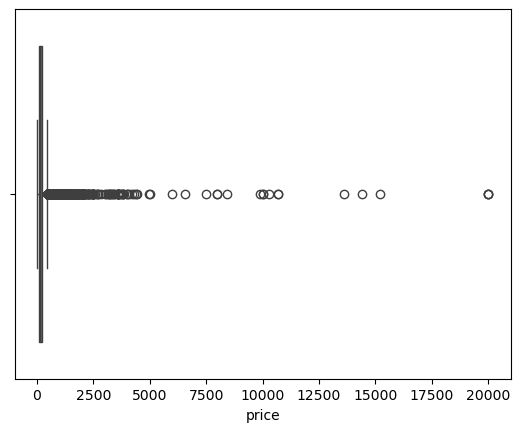

In [ ]:
sns.boxplot(x=df['price'])


## In this data, extremely high prices may be luxury listings, not errors. Very low prices may be shared rooms or data entry mistakes.

In [ ]:
df['log_price'] = np.log1p(df['price'])

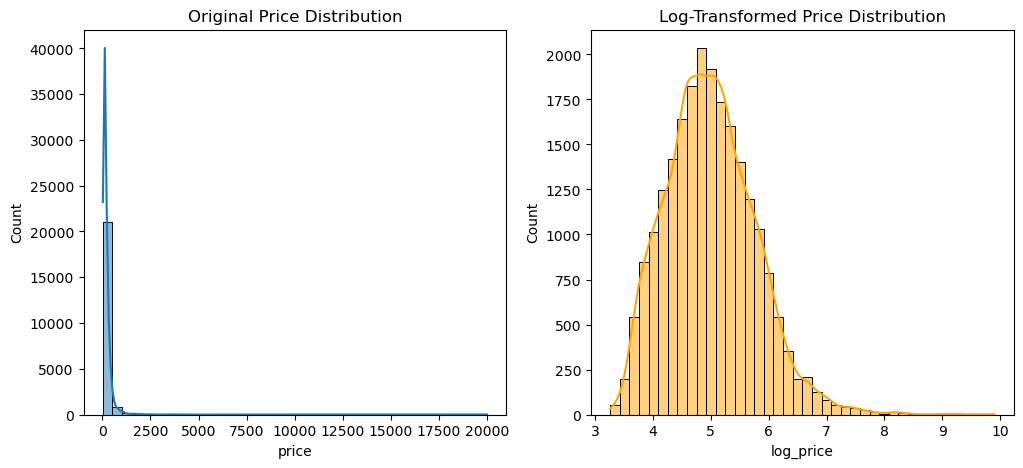

In [ ]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=40, kde=True)
plt.title('Original Price Distribution')

plt.subplot(1,2,2)
sns.histplot(df['log_price'], bins=40, kde=True, color='orange')
plt.title('Log-Transformed Price Distribution')
plt.show()

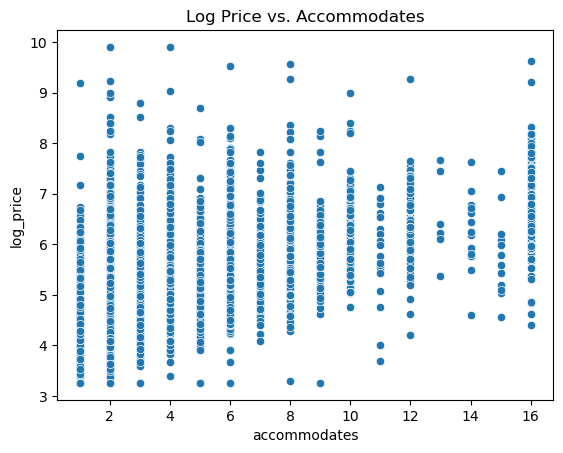

In [ ]:
sns.scatterplot(x='accommodates', y='log_price', data=df)
plt.title('Log Price vs. Accommodates')
plt.show()

## Price Determinants: Which factors (location, room type, number of reviews, amenities) most strongly relate to nightly price?

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

x = df[['accommodates', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'host_listings_count']]
x = pd.concat([x, pd.get_dummies(df['room_type']), pd.get_dummies(df['neighbourhood_cleansed'])], axis=1)

y = df['log_price']

rf = RandomForestRegressor(n_estimators=100, random_state=42)   
rf.fit(x, y)

importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances for Log Price')
plt.show()









KeyError: "['reviews_per_month', 'host_listings_count'] not in index"

## Host Activity: Do more experienced hosts (higher host_listings_count) charge differently or receive more reviews?

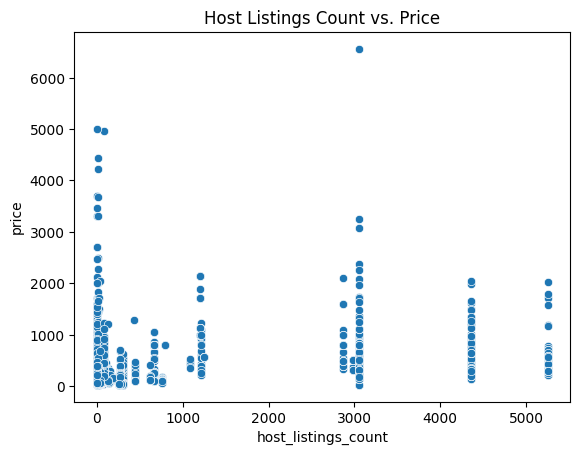

In [ ]:
sns.scatterplot(x='host_listings_count', y='price', data=df)
plt.title('Host Listings Count vs. Price')
plt.show()






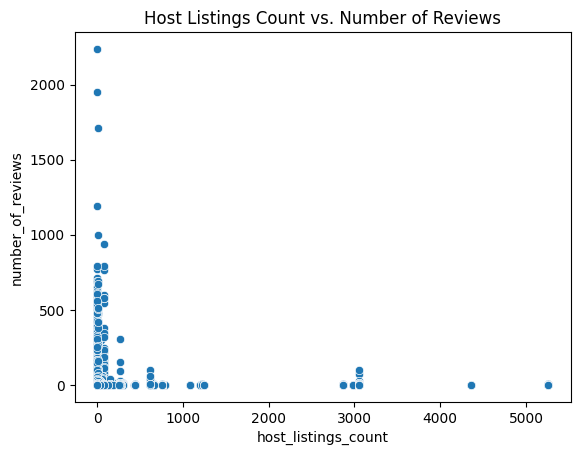

In [ ]:
sns.scatterplot(x='host_listings_count', y='number_of_reviews', data=df)
plt.title('Host Listings Count vs. Number of Reviews')
plt.show()

In [ ]:
print(df[['host_listings_count', 'log_price', 'number_of_reviews']].corr())

                     host_listings_count  log_price  number_of_reviews
host_listings_count             1.000000   0.485136          -0.239672
log_price                       0.485136   1.000000          -0.127679
number_of_reviews              -0.239672  -0.127679           1.000000


## Demand Seasonality: Is there a temporal pattern in reviews_per_month or availability_365 that suggests seasonal demand?

In [ ]:

# Extract year and month
df['review_year'] = df['last_review'].dt.year
df['review_month'] = df['last_review'].dt.month

<Figure size 1200x700 with 0 Axes>

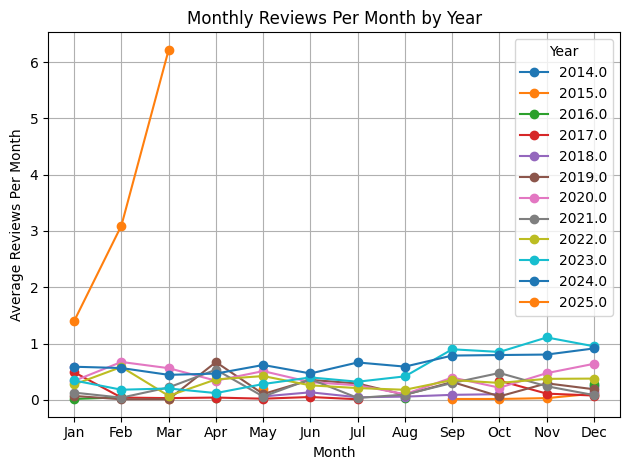

In [ ]:
# Group by year and month
monthly_yearly = (
    df.groupby(['review_year', 'review_month'])['reviews_per_month']
    .mean()
    .unstack(level=0)
    .reindex(index=range(1,13))  # Ensure all months are present
)

plt.figure(figsize=(12,7))
monthly_yearly.plot(marker='o')
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Reviews Per Month by Year')
plt.xlabel('Month')
plt.ylabel('Average Reviews Per Month')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x2000 with 0 Axes>

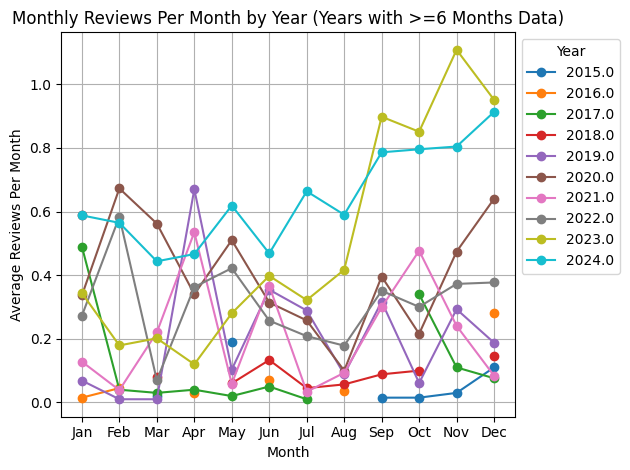

In [ ]:
# Count months per year
months_per_year = df.groupby('review_year')['review_month'].nunique()
full_years = months_per_year[months_per_year >= 6].index

# Filter to those years
monthly_yearly_filtered = monthly_yearly[full_years]

plt.figure(figsize=(12,20))
monthly_yearly_filtered.plot(marker='o')
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Reviews Per Month by Year (Years with >=6 Months Data)')
plt.xlabel('Month')
plt.ylabel('Average Reviews Per Month')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

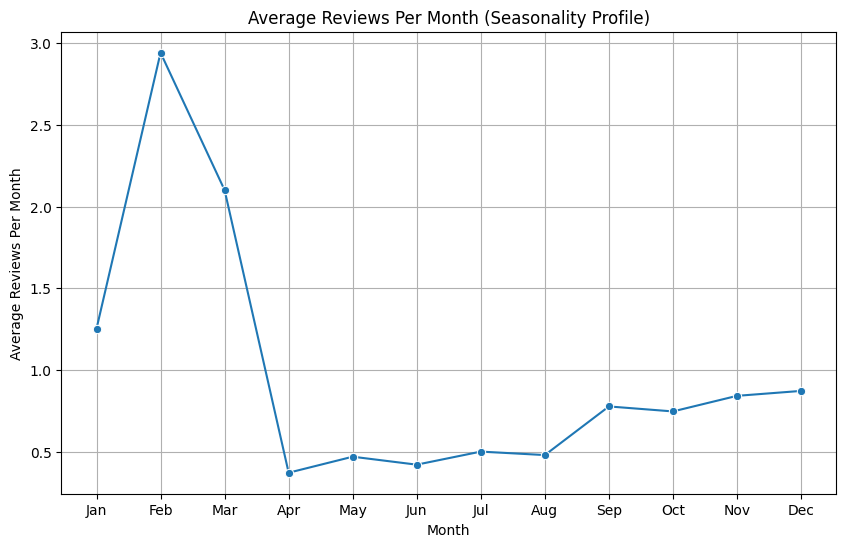

In [ ]:

# Group by month (across all years)
monthly_avg = (
    df.groupby('review_month')['reviews_per_month']
    .mean()
    .reindex(range(1,13))  # Ensure all months are present
)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Average Reviews Per Month (Seasonality Profile)')
plt.xlabel('Month')
plt.ylabel('Average Reviews Per Month')
plt.grid(True)
plt.show()

In [ ]:
# Filter for March 2015
march_2015_df = df[
    (df['last_review'].dt.year == 2015) &
    (df['last_review'].dt.month == 3)
].copy()

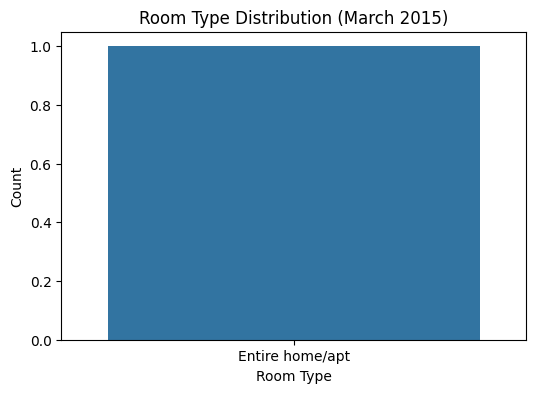

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='room_type', data=march_2015_df)
plt.title('Room Type Distribution (March 2015)')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

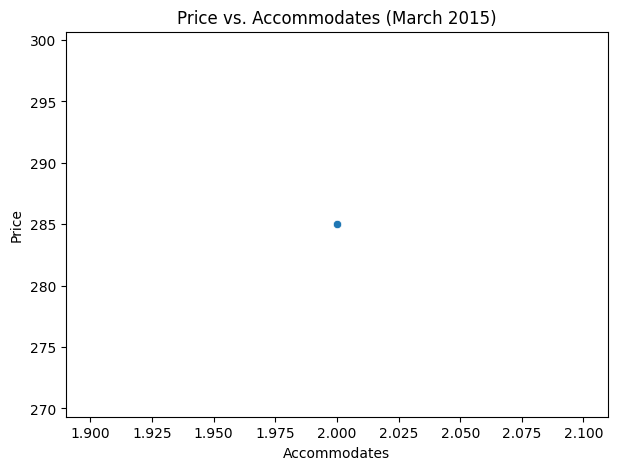

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='accommodates', y='price', data=march_2015_df)
plt.title('Price vs. Accommodates (March 2015)')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

In [ ]:
number_of_rows_2015_march = march_2015_df.shape[0]
print(f"Number of rows with last_review in March 2015: {number_of_rows_2015_march}")

Number of rows with last_review in March 2015: 1


##  Review Impact: How do review metrics (number_of_reviews, reviews_per_month, review_scores_rating) correlate with price and occupancy?

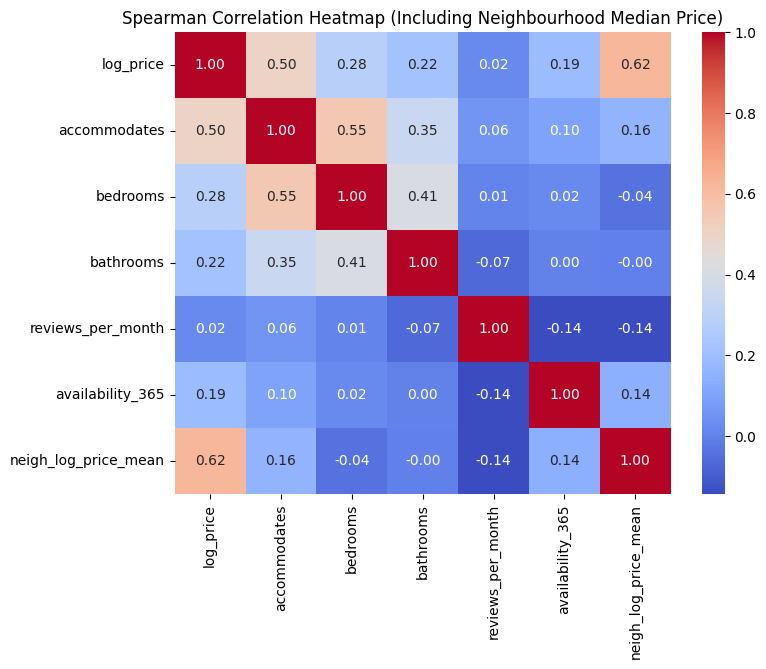

In [ ]:
neigh_price = df.groupby('neighbourhood_cleansed')['log_price'].median()
df['neigh_log_price_mean'] = df['neighbourhood_cleansed'].map(neigh_price)

# 2. Select features for heatmap
selected = ['log_price', 'accommodates', 'bedrooms', 'bathrooms', 'reviews_per_month', 'availability_365', 'neigh_log_price_mean']
small_corr = df[selected].corr(method='spearman')
plt.figure(figsize=(8,6))
sns.heatmap(small_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap (Including Neighbourhood Median Price)')
plt.show()

## Listing Characteristics: Are certain property types (e.g. entire home vs private room) more common in specific neighborhoods or price tiers?

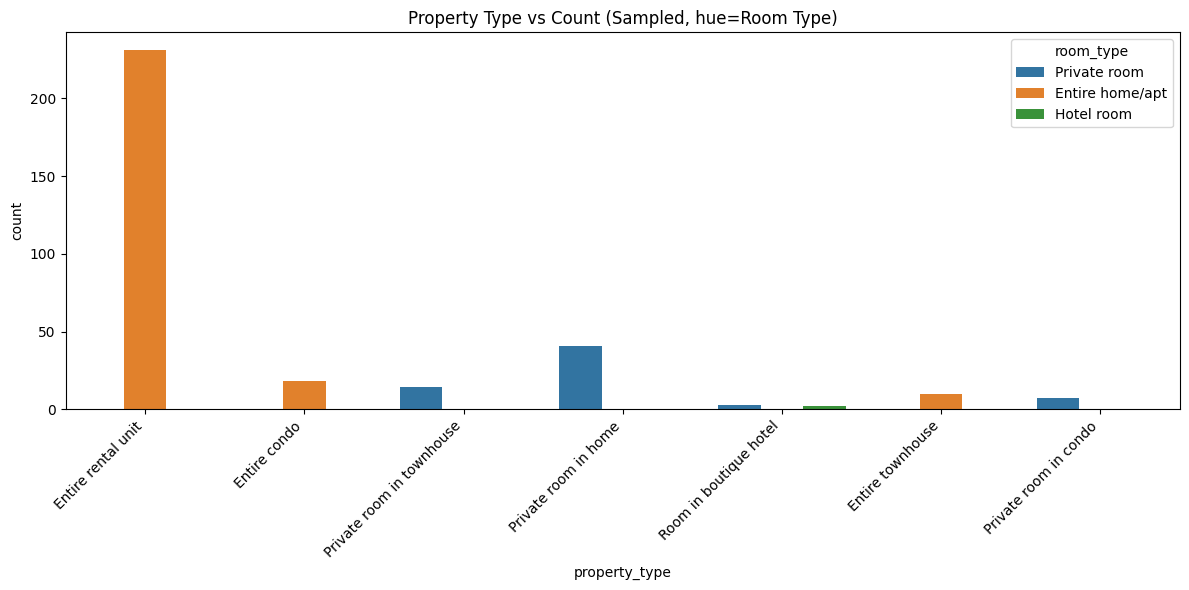

In [ ]:
# Take a random sample (e.g., 500 rows)
sample_df = df.sample(n=500, random_state=42)

plt.figure(figsize=(12,6))
sns.countplot(data=sample_df, x='property_type', hue='room_type', order=sample_df['property_type'][:8].value_counts().index)
plt.title('Property Type vs Count (Sampled, hue=Room Type)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select features (including location)
features = ['log_price', 'accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews', 'latitude', 'longitude']
X = df[features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

# Add PCA results to DataFrame
df_pca = df.loc[X.index].copy()
df_pca['PC1'] = pcs[:, 0]
df_pca['PC2'] = pcs[:, 1]

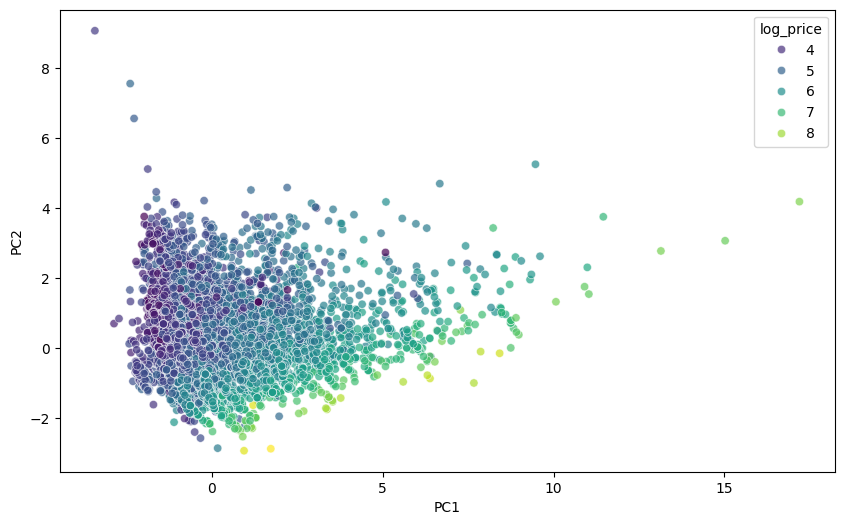

In [ ]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='log_price', data=df_pca, palette='viridis', alpha=0.7)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_pca,
    lat="latitude",
    lon="longitude",
    color="log_price",  # or 'cluster' if you have it
    size_max=8,
    zoom=11,
    mapbox_style="carto-positron",
    hover_data=["log_price", "accommodates", "bedrooms"]
)
fig.update_layout(title="Airbnb Listings by Location and Price")
fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5888\922206071.py:3: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


In [ ]:
import folium

# Center the map on the mean latitude and longitude of your listings
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add each listing as a circle marker
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Price: {row['price']}"  # You can customize this popup
    ).add_to(m)

# Save the map to an HTML file
m.save('airbnb_map.html')

In [ ]:
import folium

df1 = df.sample(random_state=42, n=500, ignore_index=True)
# Center of map (mean coordinates or fixed point)
center_lat = df1['latitude'].mean()
center_lon = df1['longitude'].mean()

# Create map object
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers
for idx, row in df1.iterrows():
    popup_text = f"""
    <b>Location:</b> {row.get('latitude', 'N/A')}<br>
    <b>Location:</b> {row.get('longitude', 'N/A')}<br>
    <b>Description:</b> {row.get('description_summary', 'No description')}<br>
    <b>Review Score:</b> {row.get('review_scores_accuracy', 'N/A')}<br>
    <b>Keywords:</b> {row.get('keywords_clean', '')}
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=row.get('address', 'Click for details')
    ).add_to(m)

# Save to HTML
m.save('apartments_map.html')


In [ ]:
df['description'].iloc[3]

'This charming distancing-friendly month-to-month home away from home located in Historic Harlem, Uptown Sanctuary is ideal for lovers of travel, work-life balance, art, soulful living,  culture, and kindness.<br /><br />Spacious bedroom available (if you require more space, please inquiry about the master bedroom with its own ensuite bathroom or renting the whole place).<br /><br />➨ Minimum 30-day stay only, thank you for understanding!<br />➨ Additional fees apply for events and must be approved in advance.'

In [ ]:
df['description_summary'] = df['description'].apply(lambda x: extract_keywords_from_description(x, keywords))


## Let's do text summarizer for description column since not many people are gonna read the whole description of apartaments, during the search. Just the keywords and reasonable summary would be sufficinet.

In [ ]:
df['description_summary'].iloc[8]

'kitchen, quiet, transport, public transport, shopping'

In [ ]:
df.drop(columns=['description'], inplace=True)
